# Creating Alternative train/validation set

Many of the images in the larger version of this dataset are incorrectly labeled. Images that are part of sequence all share the same categorical label however not all images in that sequence actually contain the species from that category. Due to project time constraints I wanted to improve model performance in a time efficent less-labor intensive manner. Creating a version of the dataset that only uses the first image from a sequence should hopefully result in a dataset that has fewer incorrectly labeled images operating under the assumption the first image in a sequence is the image to most likely have the correct label. This should hopefully increase model confidence in images it correctly labels and decrease confidence it incorrectly labels overall decreasing loss. It won't effect the loss created when the model correctly labels an image that is incorrectly labeled by the dataset (which is thereby flagged by the model as an incorrect labeling) but is a step in that direction. 

In [1]:
import pandas as pd
import numpy as np
import json
from PIL import Image
import seaborn as sns


In [2]:
def json_to_dataframe2(json_file):
    """Converting json file into pandas dataframe that includes select data from the images and annotations sections of the json file"""
    with open(json_file) as json_data:
        data=json.load(json_data)
    imag=data['images']
    image_info=pd.DataFrame(imag)
    image_info.rename(columns={'file_name':'image_id'},inplace=True)
    image_info1=image_info[['image_id','frame_num']].copy()
    annot=data['annotations']
    annotations=pd.DataFrame(annot)
    annotations['image_id']=annotations['image_id']+'.JPG'
    df=annotations.merge(image_info1, how='left',on='image_id')
    df.fillna(0,inplace=True)
    
    return df

In [3]:
df = json_to_dataframe2('SnapshotSerengetiS01.json')
df

,sequence_level_annotation,id,category_id,seq_id,season,datetime,subject_id,count,standing,resting,moving,interacting,young_present,image_id,location,frame_num
0,True,1ab1a30c-955a-11e9-ad1e-000d3a198845,1,SER_S1#B04#1#1,S1,2010-07-18 16:26:14,ASG0002kjh,1,0.62,0.06,0.0,0.50,0.0,S1/B04/B04_R1/S1_B04_R1_PICT0001.JPG,B04,1
1,True,1ab1a30d-955a-11e9-a37d-000d3a198845,1,SER_S1#B04#1#2,S1,2010-07-18 16:26:30,ASG0002kji,2,0.10,0.62,0.0,0.33,0.0,S1/B04/B04_R1/S1_B04_R1_PICT0002.JPG,B04,1
2,True,1ab1a30e-955a-11e9-aeae-000d3a198845,0,SER_S1#B04#1#3,S1,2010-07-20 06:14:06,ASG0002kjj,0,0.00,0.00,0.0,0.00,0.0,S1/B04/B04_R1/S1_B04_R1_PICT0003.JPG,B04,1
3,True,1ab1a30f-955a-11e9-980a-000d3a198845,0,SER_S1#B04#1#4,S1,2010-07-22 08:56:06,ASG0002kjk,0,0.00,0.00,0.0,0.00,0.0,S1/B04/B04_R1/S1_B04_R1_PICT0004.JPG,B04,1
4,True,1ab1a310-955a-11e9-99ae-000d3a198845,0,SER_S1#B04#1#5,S1,2010-07-24 01:16:28,ASG0002kjl,0,0.00,0.00,0.0,0.00,0.0,S1/B04/B04_R1/S1_B04_R1_PICT0005.JPG,B04,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412853,True,1e2e4972-955a-11e9-a26d-000d3a198845,0,SER_S1#V13#1#1416,S1,2010-09-25 05:17:04,ASG0003eby,0,0.00,0.00,0.0,0.00,0.0,S1/V13/V13_R1/S1_V13_R1_PICT4243.JPG,V13,1
412854,True,1e2e4973-955a-11e9-8440-000d3a198845,0,SER_S1#V13#1#1416,S1,2010-09-25 05:17:04,ASG0003eby,0,0.00,0.00,0.0,0.00,0.0,S1/V13/V13_R1/S1_V13_R1_PICT4244.JPG,V13,2
412855,True,1e2e4974-955a-11e9-af3a-000d3a198845,0,SER_S1#V13#1#1416,S1,2010-09-25 05:17:04,ASG0003eby,0,0.00,0.00,0.0,0.00,0.0,S1/V13/V13_R1/S1_V13_R1_PICT4245.JPG,V13,3
412856,True,1e2e4975-955a-11e9-9b38-000d3a198845,0,SER_S1#V13#1#1417,S1,2010-09-25 05:22:18,ASG0003ebz,0,0.00,0.00,0.0,0.00,0.0,S1/V13/V13_R1/S1_V13_R1_PICT4246.JPG,V13,1


In [4]:
df2 = json_to_dataframe2('SnapshotSerengetiS02.json')

In [5]:
df3 = json_to_dataframe2('SnapshotSerengetiS03.json')

In [6]:
df_conc=pd.concat([df,df2,df3],ignore_index=True)
df_conc

,sequence_level_annotation,id,category_id,seq_id,season,datetime,subject_id,count,standing,resting,moving,interacting,young_present,image_id,location,frame_num
0,True,1ab1a30c-955a-11e9-ad1e-000d3a198845,1,SER_S1#B04#1#1,S1,2010-07-18 16:26:14,ASG0002kjh,1,0.62,0.06,0.0,0.50,0.0,S1/B04/B04_R1/S1_B04_R1_PICT0001.JPG,B04,1
1,True,1ab1a30d-955a-11e9-a37d-000d3a198845,1,SER_S1#B04#1#2,S1,2010-07-18 16:26:30,ASG0002kji,2,0.10,0.62,0.0,0.33,0.0,S1/B04/B04_R1/S1_B04_R1_PICT0002.JPG,B04,1
2,True,1ab1a30e-955a-11e9-aeae-000d3a198845,0,SER_S1#B04#1#3,S1,2010-07-20 06:14:06,ASG0002kjj,0,0.00,0.00,0.0,0.00,0.0,S1/B04/B04_R1/S1_B04_R1_PICT0003.JPG,B04,1
3,True,1ab1a30f-955a-11e9-980a-000d3a198845,0,SER_S1#B04#1#4,S1,2010-07-22 08:56:06,ASG0002kjk,0,0.00,0.00,0.0,0.00,0.0,S1/B04/B04_R1/S1_B04_R1_PICT0004.JPG,B04,1
4,True,1ab1a310-955a-11e9-99ae-000d3a198845,0,SER_S1#B04#1#5,S1,2010-07-24 01:16:28,ASG0002kjl,0,0.00,0.00,0.0,0.00,0.0,S1/B04/B04_R1/S1_B04_R1_PICT0005.JPG,B04,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1394770,True,267ee3ce-955a-11e9-a3d4-000d3a198845,0,SER_S3#U10#12#622,S3,2012-01-07 12:32:45,ASG000b3av,0,0.00,0.00,0.0,0.00,0.0,S3/U10/U10_R12/S3_U10_R12_IMAG1653.JPG,U10,2
1394771,True,267ee3cf-955a-11e9-862b-000d3a198845,0,SER_S3#U10#12#622,S3,2012-01-07 12:32:45,ASG000b3av,0,0.00,0.00,0.0,0.00,0.0,S3/U10/U10_R12/S3_U10_R12_IMAG1654.JPG,U10,3
1394772,True,267ee3d0-955a-11e9-a8ae-000d3a198845,0,SER_S3#U10#12#623,S3,2012-01-07 12:34:05,ASG000b333,0,0.00,0.00,0.0,0.00,0.0,S3/U10/U10_R12/S3_U10_R12_IMAG1655.JPG,U10,1
1394773,True,267ee3d1-955a-11e9-adc9-000d3a198845,0,SER_S3#U10#12#623,S3,2012-01-07 12:34:05,ASG000b333,0,0.00,0.00,0.0,0.00,0.0,S3/U10/U10_R12/S3_U10_R12_IMAG1656.JPG,U10,2


Removing images present in the dataframe but not present in actual image files

In [7]:
import os, random, math, glob
path=''
is_f=[]
for p in df_conc.image_id.values:
    if os.path.isfile(path+p):
        is_f.append(1)
    else:
        is_f.append(0)
df_conc['is_f']=is_f
df_conc=df_conc.loc[df_conc.is_f==1].copy()
df_conc.shape

(1379650, 17)

In [8]:
df_frame1=df_conc[df_conc.frame_num==1].copy()
df_f1=df_frame1[['category_id','season','datetime','count','image_id']].copy()

In [9]:
with open('SnapshotSerengetiS01.json') as json_data:
    data=json.load(json_data)
cats=data['categories']
categories=pd.DataFrame(cats)
categories

,id,name
0,0,empty
1,1,human
2,2,gazellegrants
3,3,reedbuck
4,4,dikdik
...,...,...
56,56,hyenabrown
57,57,wilddog
58,58,kudu
59,59,pangolin


In [10]:
categories.rename(columns={'id':'category_id','name':'species'},inplace=True)
frame1_labels=categories.merge(df_f1,on='category_id')
frame1_labels

,category_id,species,season,datetime,count,image_id
0,0,empty,S1,2010-07-20 06:14:06,0,S1/B04/B04_R1/S1_B04_R1_PICT0003.JPG
1,0,empty,S1,2010-07-22 08:56:06,0,S1/B04/B04_R1/S1_B04_R1_PICT0004.JPG
2,0,empty,S1,2010-07-24 01:16:28,0,S1/B04/B04_R1/S1_B04_R1_PICT0005.JPG
3,0,empty,S1,2010-07-30 05:24:50,0,S1/B04/B04_R1/S1_B04_R1_PICT0010.JPG
4,0,empty,S1,2010-07-30 20:54:16,0,S1/B04/B04_R1/S1_B04_R1_PICT0011.JPG
...,...,...,...,...,...,...
500495,48,reptiles,S1,2010-10-02 11:19:42,1,S1/T13/T13_R1/S1_T13_R1_PICT5510.JPG
500496,48,reptiles,S1,2010-10-02 11:46:56,1,S1/T13/T13_R1/S1_T13_R1_PICT5540.JPG
500497,48,reptiles,S1,2010-10-02 11:56:24,1,S1/T13/T13_R1/S1_T13_R1_PICT5546.JPG
500498,48,reptiles,S1,2010-09-23 11:56:36,1,S1/U13/U13_R1/S1_U13_R1_PICT0083.JPG


In [11]:
#drop 90% of empty to help with imbalance issues
to_drop_train=frame1_labels[(frame1_labels['species']=='empty')].sample(frac=.9,random_state=42).index
frame1_labels.drop(to_drop_train,inplace=True)
frame1_labels.shape

(179924, 6)

In [12]:
frame1_labels['species'].value_counts()

wildebeest         39560
empty              35619
zebra              31332
gazellethomsons    25199
hartebeest          4989
buffalo             4836
gazellegrants       4618
guineafowl          4151
giraffe             3280
elephant            3146
warthog             3106
hyenaspotted        3057
lionfemale          2145
otherbird           2028
impala              1817
reedbuck            1398
eland               1257
topi                1103
hippopotamus        1019
dikdik               835
cheetah              710
lionmale             679
baboon               564
koribustard          460
ostrich              364
hare                 296
jackal               289
batearedfox          231
serval               199
aardvark             196
monkeyvervet         188
secretarybird        155
mongoose             150
porcupine            145
reptiles             119
aardwolf              99
hyenastriped          96
leopard               91
bushbuck              83
caracal               57


In [13]:
frame1_labels.reset_index(inplace=True)
frame1_labels.drop(columns=['index'],inplace=True)
frame1_labels

,category_id,species,season,datetime,count,image_id
0,0,empty,S1,2010-08-02 11:43:14,0,S1/B04/B04_R1/S1_B04_R1_PICT0014.JPG
1,0,empty,S1,2010-07-27 18:29:48,0,S1/B05/B05_R1/S1_B05_R1_PICT0020.JPG
2,0,empty,S1,2010-08-03 01:06:08,0,S1/B05/B05_R1/S1_B05_R1_PICT0050.JPG
3,0,empty,S1,2010-09-05 05:17:08,0,S1/B05/B05_R3/S1_B05_R3_PICT0059.JPG
4,0,empty,S1,2010-09-05 12:26:08,0,S1/B05/B05_R3/S1_B05_R3_PICT0062.JPG
...,...,...,...,...,...,...
179919,48,reptiles,S1,2010-10-02 11:19:42,1,S1/T13/T13_R1/S1_T13_R1_PICT5510.JPG
179920,48,reptiles,S1,2010-10-02 11:46:56,1,S1/T13/T13_R1/S1_T13_R1_PICT5540.JPG
179921,48,reptiles,S1,2010-10-02 11:56:24,1,S1/T13/T13_R1/S1_T13_R1_PICT5546.JPG
179922,48,reptiles,S1,2010-09-23 11:56:36,1,S1/U13/U13_R1/S1_U13_R1_PICT0083.JPG


In [14]:
def look_at_those_animals(species_type,random_state):
    image_ids=frame1_labels[frame1_labels['species']==species_type]['image_id']
    print(image_ids.shape)
    image=image_ids.sample(random_state=random_state).values[0]
    print(image)
    IM=Image.open('{}'.format(image),'r')
    return IM

(3280,)
S2/L08/L08_R3/S2_L08_R3_IMAG0028.JPG


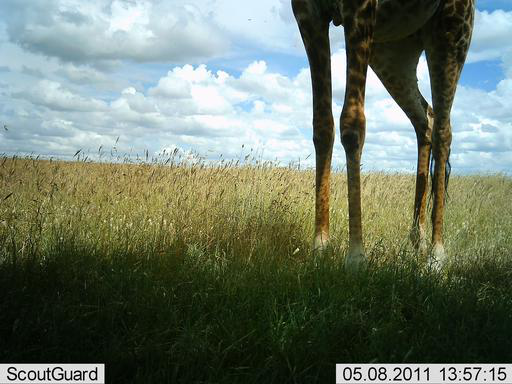

In [15]:
look_at_those_animals('giraffe',10)

(119,)
S1/O10/O10_R1/S1_O10_R1_PICT1460.JPG


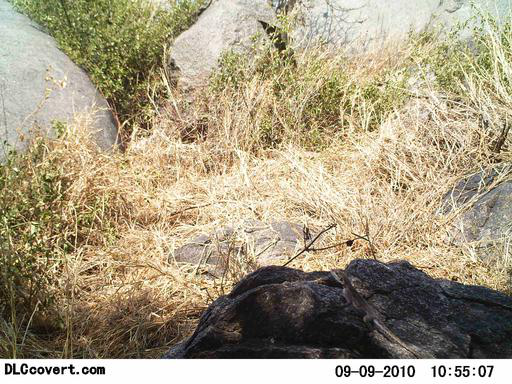

In [16]:
look_at_those_animals('reptiles',10)

In [17]:
frame1_labels.to_csv('frame1_labels.csv')